---
title: "Polynomial Regression"
author: "Devakinandan Palla"
format: 
  html:
    theme: cosmo
    embed-resources: true
---


# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
# Code Here
!pip install palmerpenguins

In [2]:
from palmerpenguins import load_penguins
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We dummify non numeric/categorical variables

In [3]:
import pandas as pd

In [6]:
penguins_dummified = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)

print("\nFirst few rows of the dummified dataset:")
penguins_dummified.head()



First few rows of the dummified dataset:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [7]:
from sklearn.linear_model import LinearRegression


In [8]:
import numpy as np

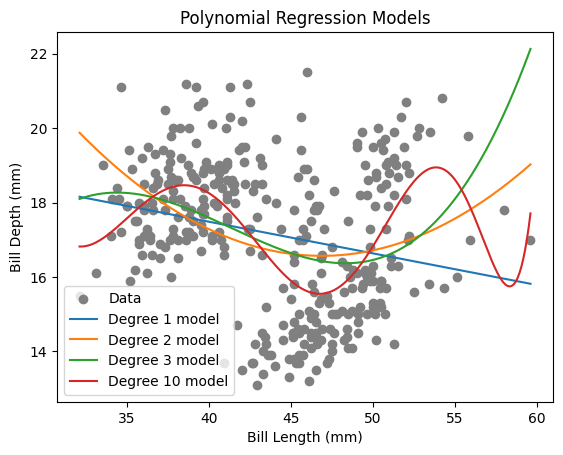

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from palmerpenguins import load_penguins

penguins = load_penguins()

penguins = penguins[['bill_length_mm', 'bill_depth_mm']].dropna()

X = penguins['bill_length_mm'].values.reshape(-1, 1)
y = penguins['bill_depth_mm'].values

degrees = [1, 2, 3, 10]
plt.scatter(X, y, color='gray', label='Data')

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_fit = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_fit = model.predict(poly.transform(X_fit))

    plt.plot(X_fit, y_fit, label=f'Degree {degree} model')

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Polynomial Regression Models')
plt.legend()
plt.show()

This code fits and plots polynomial regression models of degrees 1, 2, 3, and 10 to predict bill_depth_mm from bill_length_mm in the Palmer Penguins dataset.

It visualizes the models' fits on a scatter plot for comparison, highlighting the impact of polynomial degree on model complexity and fit.

Degree 1 (blue): Underfits with a simple straight line.

Degree 2 (orange): Fits slightly better but lacks complexity.

Degree 3 (green): Captures more data trends with moderate fit.

Degree 10 (red): Overfits by following data noise, risking poor generalization.

(Chatgpt helped me confirming my understanding of above process)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Reasoning:

Underfitting (Degree 1): Too simple; fails to capture data variability.

Overfitting (Degree 10): Too complex; follows noise, risking poor generalization.

Best fit (Degree 3): Balanced complexity; captures trends without overfitting.





